#  TimeLine of the Project:
- Importing Data

- Data Analysis

- Data Processing

- Model Building

- Hypertuning of models

# step-1:Business Problem Understanding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


# Step-2 Data Understanding

In [2]:
well1 = pd.read_csv('well 1.csv')
well2 = pd.read_csv('well 2.csv')
well3 = pd.read_csv('well 3.csv')
well4 = pd.read_csv('well 4.csv')
well5 = pd.read_csv('well 5.csv')
well6 = pd.read_csv('well 6.csv')
well7 = pd.read_csv('well 7.csv')
well8 = pd.read_csv('well 8.csv')

In [3]:
df = pd.concat([well1,well2, well3,well4,well5,well6,well7,well8])
df

,DEPTH,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress,PP
0,22.0024,57.3820,1.4506,1.4614,0.033808,11.4844,66.1596,0.7881,3.127835e+05,1609.0
1,22.1548,58.0070,1.4506,1.4594,0.044766,11.4844,66.1591,0.7751,3.149500e+05,1609.0
2,22.3072,59.1046,1.4506,1.4577,0.064012,11.4844,66.1585,0.7798,3.171165e+05,1609.0
3,22.4596,59.2124,1.4506,1.4567,0.065902,11.4844,66.1581,0.7711,3.192830e+05,1609.0
4,22.6120,59.8294,1.4506,1.4564,0.076721,11.4844,66.1575,0.7446,3.214495e+05,1609.0
...,...,...,...,...,...,...,...,...,...,...
1038,181.3026,105.3357,1.8353,1.4914,0.898063,9.9461,51.5604,1.1152,3.260898e+06,1805.0
1039,181.4550,103.8500,1.8245,1.4815,0.876908,9.9117,54.9033,1.1240,3.244434e+06,1805.0
1040,181.6074,103.2400,1.8128,1.4755,0.868221,9.8249,52.2509,1.1346,3.226335e+06,1803.0
1041,181.7598,102.9838,1.7950,1.4691,0.864573,9.8545,53.2176,1.1472,3.197337e+06,1808.0


In [4]:
df.shape

(11494, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11494 entries, 0 to 1042
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DEPTH        11494 non-null  float64
 1   GR           11494 non-null  float64
 2   RHOB         11494 non-null  float64
 3   Vp           11494 non-null  float64
 4   Vsh          11494 non-null  float64
 5   Caliper      11494 non-null  float64
 6   Porosity     11494 non-null  float64
 7   Resistivity  11494 non-null  float64
 8   Stress       11494 non-null  float64
 9   PP           11494 non-null  float64
dtypes: float64(10)
memory usage: 987.8 KB


# Step-3 Data Preprocessing

In [6]:
df.describe()

,DEPTH,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress,PP
count,11494.000000,11494.000000,11494.000000,11494.000000,11494.000000,11494.000000,11494.000000,11494.000000,1.149400e+04,11494.000000
mean,139.708824,92.087422,1.805392,-25.703265,0.661127,10.091069,59.443962,0.987094,2.535401e+06,1840.075003
std,74.660054,8.951782,0.135371,162.894928,0.451688,0.632879,6.693833,0.266715,1.450494e+06,219.426644
min,5.948800,42.267500,1.082400,-999.250000,-0.162116,9.415300,41.174600,0.357000,6.647748e+04,1416.000000
25%,78.177400,87.600575,1.737000,1.511500,0.575324,9.777000,54.937325,0.839525,1.376452e+06,1668.000000
50%,132.923800,92.628000,1.816700,1.537000,0.672497,9.967150,58.791100,0.951200,2.353846e+06,1823.000000
75%,191.025100,97.888425,1.900200,1.580200,0.757985,10.245500,63.029525,1.090200,3.424687e+06,2006.000000
max,335.882800,114.995600,2.117400,1.724800,46.208200,16.375000,98.848500,2.869200,6.932513e+06,2314.000000


In [7]:
df.isnull().sum()

DEPTH          0
GR             0
RHOB           0
Vp             0
Vsh            0
Caliper        0
Porosity       0
Resistivity    0
Stress         0
PP             0
dtype: int64

In [8]:
df.corr()

,DEPTH,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress,PP
DEPTH,1.000000,0.382805,0.641723,-0.077627,0.104806,-0.408809,-0.575969,0.557705,0.995482,0.744662
GR,0.382805,1.000000,0.556070,-0.045960,0.279316,-0.354093,-0.512052,0.306742,0.393128,0.384993
RHOB,0.641723,0.556070,1.000000,-0.063241,0.181882,-0.635068,-0.902506,0.537904,0.683717,0.656837
Vp,-0.077627,-0.045960,-0.063241,1.000000,-0.015477,0.004670,0.079858,-0.092496,-0.079192,-0.008123
Vsh,0.104806,0.279316,0.181882,-0.015477,1.000000,-0.122491,-0.167045,0.103310,0.109694,0.138520
Caliper,-0.408809,-0.354093,-0.635068,0.004670,-0.122491,1.000000,0.587034,-0.379278,-0.406325,-0.417747
Porosity,-0.575969,-0.512052,-0.902506,0.079858,-0.167045,0.587034,1.000000,-0.509666,-0.613924,-0.608846
Resistivity,0.557705,0.306742,0.537904,-0.092496,0.103310,-0.379278,-0.509666,1.000000,0.576152,0.655044
Stress,0.995482,0.393128,0.683717,-0.079192,0.109694,-0.406325,-0.613924,0.576152,1.000000,0.758844
PP,0.744662,0.384993,0.656837,-0.008123,0.138520,-0.417747,-0.608846,0.655044,0.758844,1.000000


In [9]:
df.shape

(11494, 10)

# Data cleaning

In [10]:
df.isnull().sum()

DEPTH          0
GR             0
RHOB           0
Vp             0
Vsh            0
Caliper        0
Porosity       0
Resistivity    0
Stress         0
PP             0
dtype: int64

In [11]:
#Data Wanfling/ Enconding

# Outliers

For training data

In [12]:

df.columns

Index(['DEPTH', 'GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity', 'Stress', 'PP'],
      dtype='object')

In [13]:
cols=['DEPTH', 'GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity', 'Stress', 'PP']

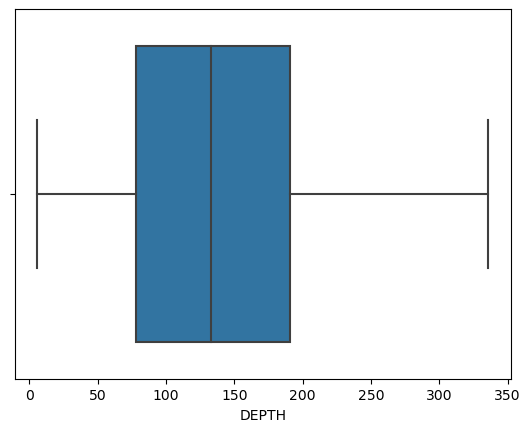

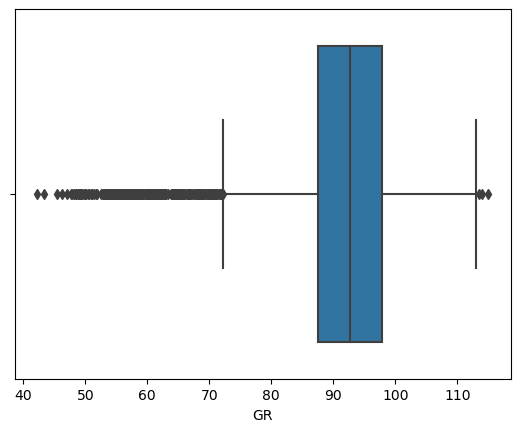

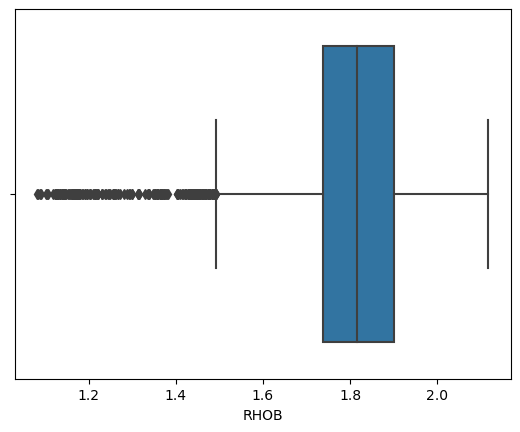

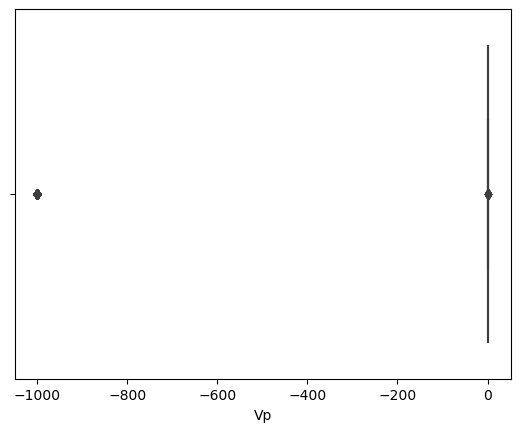

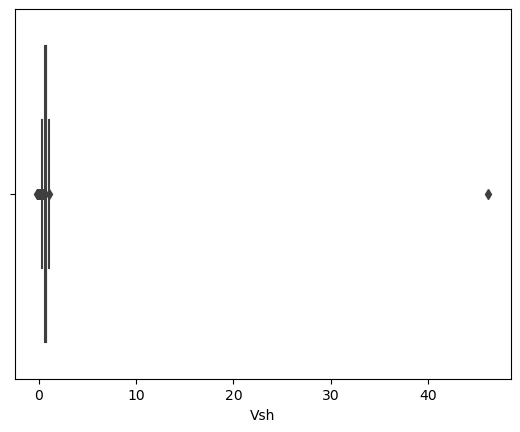

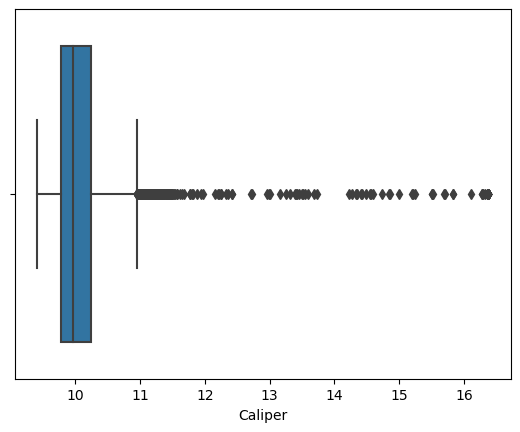

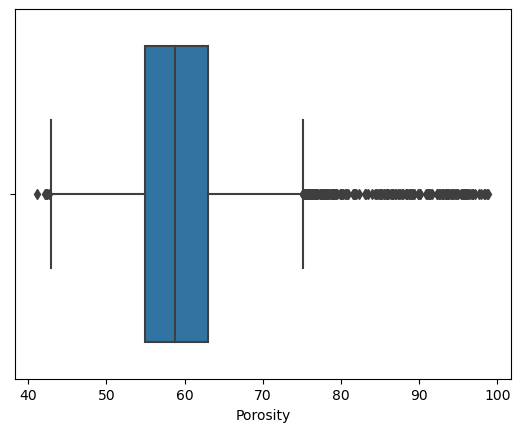

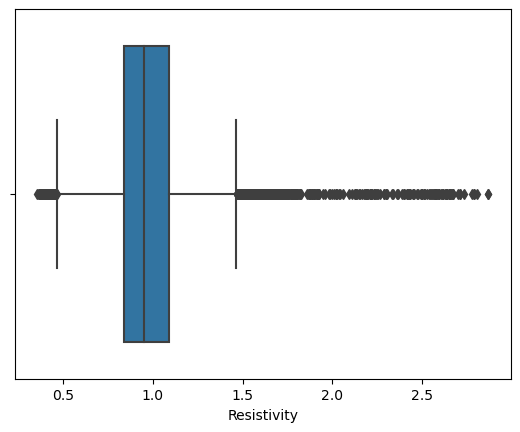

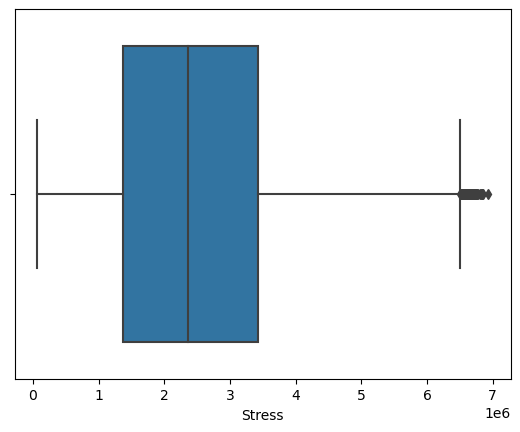

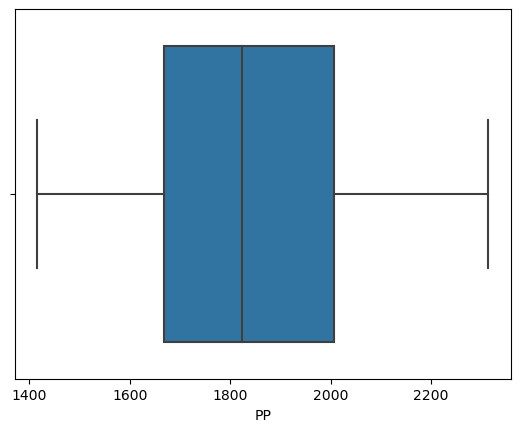

In [14]:
for col in cols:
    plt.figure()
    sns.boxplot(df[col])

<AxesSubplot:xlabel='GR'>

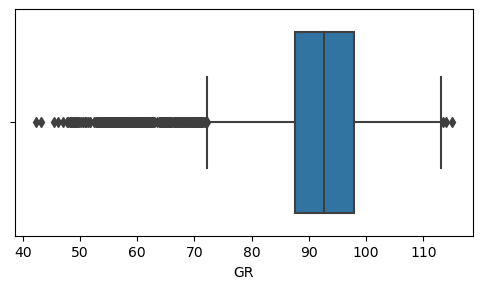

In [15]:
plt.figure(figsize=(13,10))
plt.subplot(3,2,1)
sns.boxplot(df['GR'])
#plt.title('Before Outlier Removal', size=15)

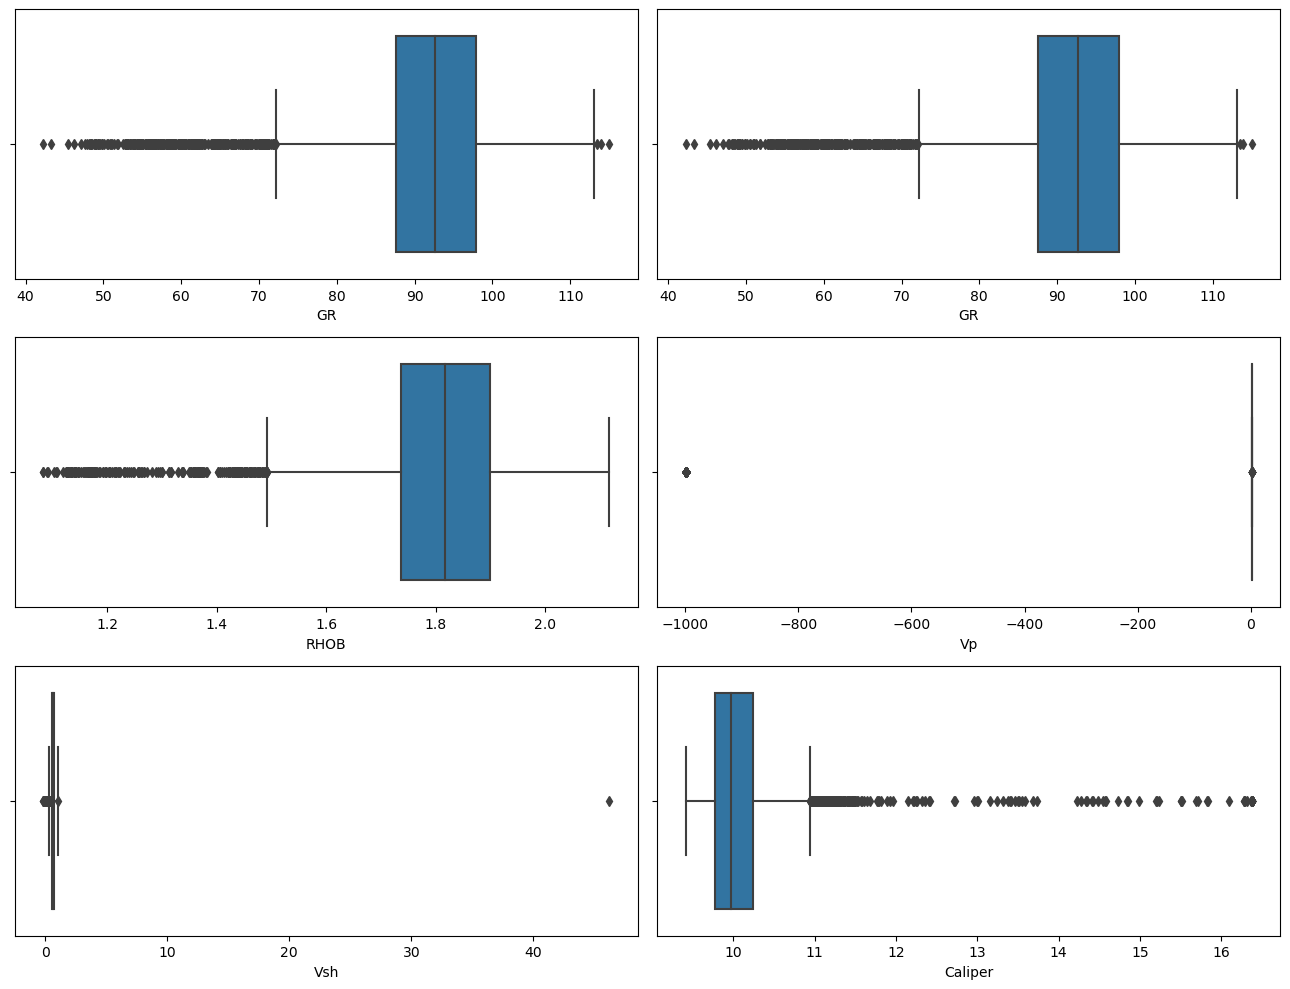

In [16]:
plt.figure(figsize=(13,10))
plt.subplot(3,2,1)
sns.boxplot(df['GR'])
#plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
sns.boxplot(df['GR'])
#plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
sns.boxplot(df['RHOB'])
#plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
sns.boxplot(df['Vp'])
#plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
sns.boxplot(df['Vsh'])
#plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
sns.boxplot(df['Caliper'])
#plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout()
plt.show()

In [17]:
# GR

df['GR'][df['GR']<70]=np.nan
#RHOB
df['RHOB'][df['RHOB']<1.5]= np.nan
#Vp
df['Vp'][df['Vp']>1.70]=np.nan
#Vsh
df['Vsh'][df['Vsh']<0.37] = np.nan
#caliper
df['Caliper'][df['Caliper']>11]=np.nan
#Porosity
df['Porosity'][df['Porosity']>75]=np.nan
#Resistivity
df['Resistivity'][df['Resistivity']>1.5]= np.nan

In [18]:
df=df.dropna()

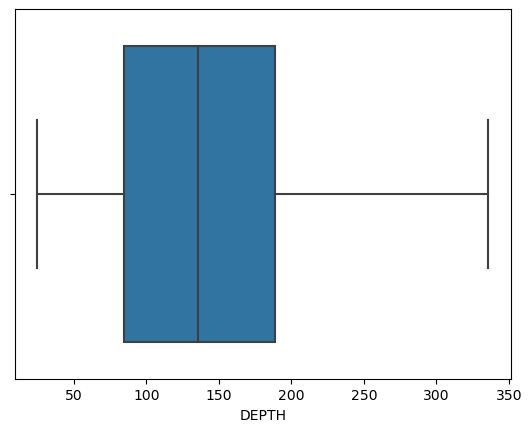

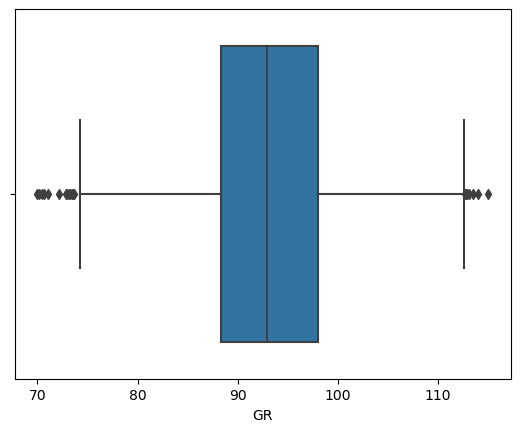

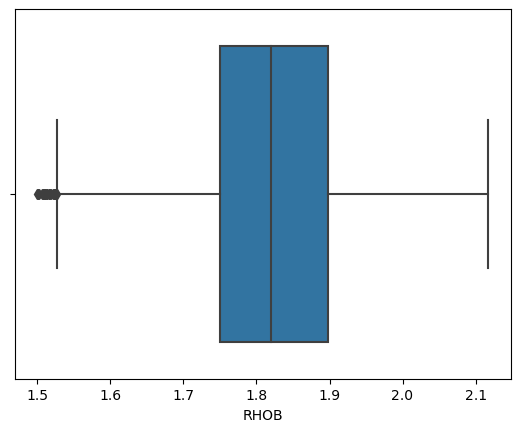

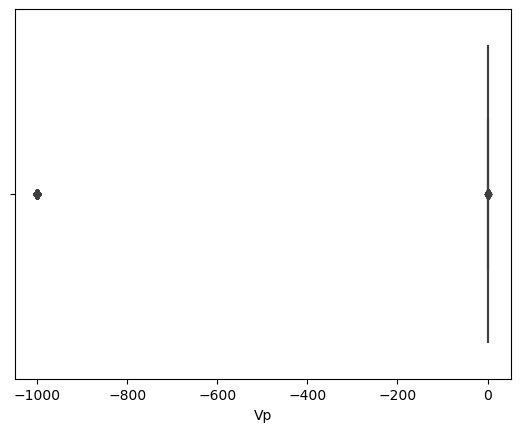

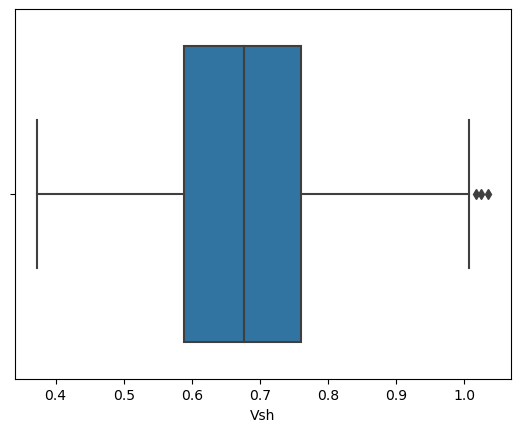

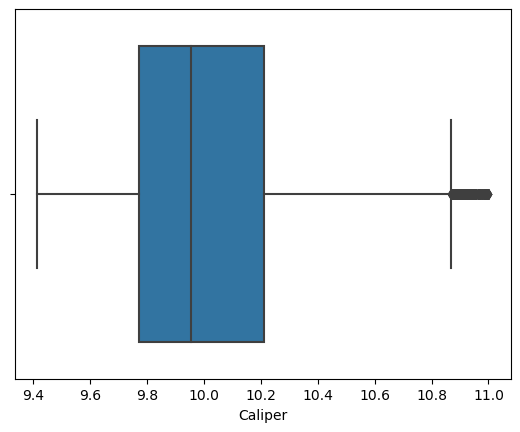

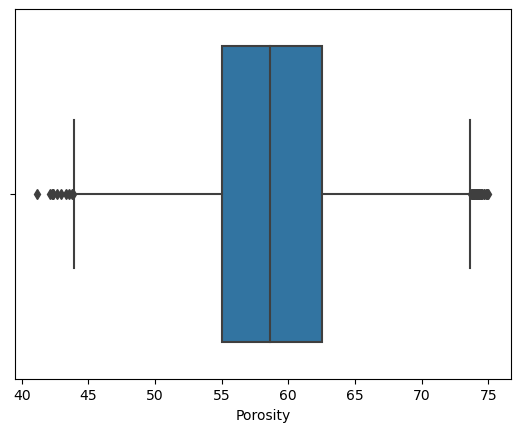

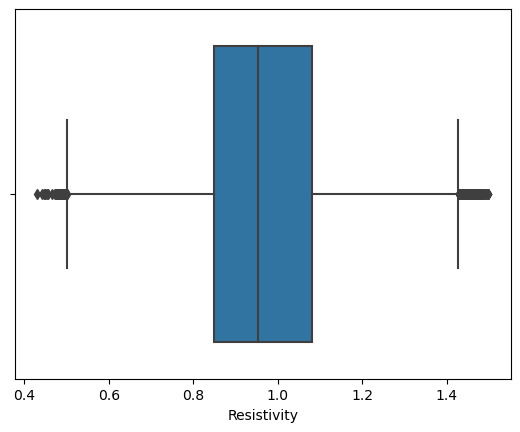

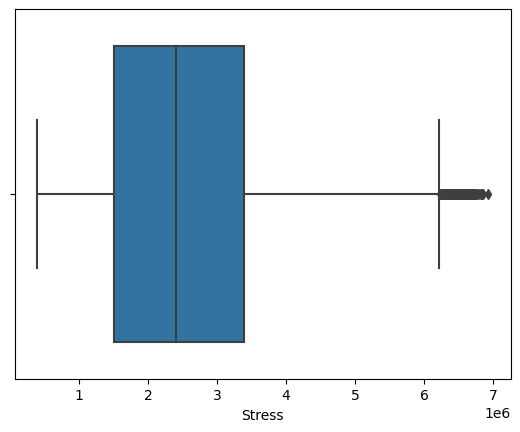

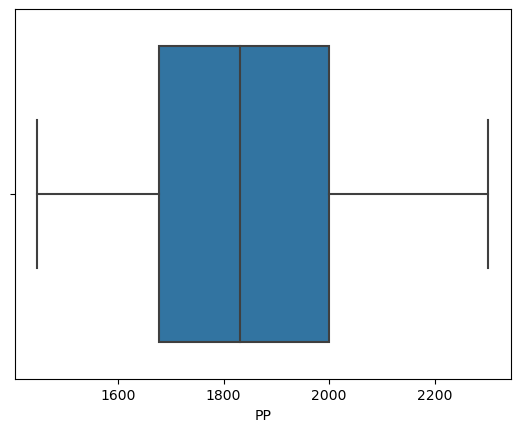

In [19]:
for col in cols :
    plt.figure()
    sns.boxplot(df[col])

# OUtlier Removed

Shape of train data after outlier removal

In [20]:
print('Train size: ', df.shape)


Train size:  (10408, 10)


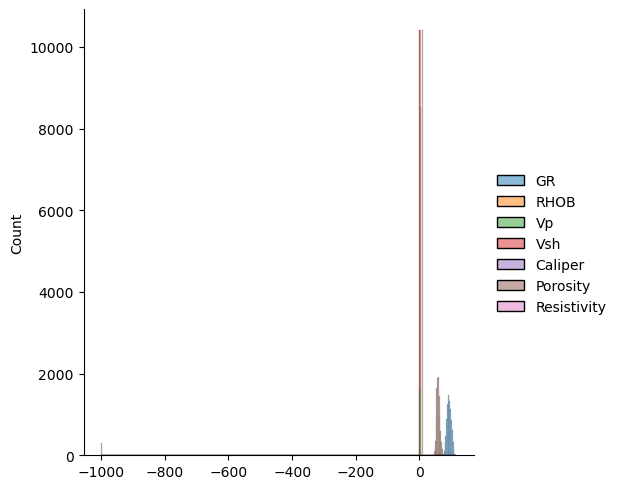

In [21]:
sns.displot(df[['GR','RHOB','Vp','Vsh','Caliper','Porosity',
               'Resistivity']])

# Better to scale these values to(0,1)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scale= MinMaxScaler()

In [24]:
cols=['GR','RHOB','Vp','Vsh','Caliper','Porosity',
     'Resistivity','Stress']

# Train Data

In [25]:
scaled= scale.fit_transform(df[['GR','RHOB','Vp','Vsh','Caliper','Porosity',
            'Resistivity','Stress' ]])

In [26]:
scaled_df= pd.DataFrame(scaled,columns=cols)

In [27]:
df=df.reset_index()

In [28]:
scaled_df

,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress
0,0.095351,0.087316,0.999789,0.002970,0.937192,0.726727,0.314069,0.017649
1,0.277994,0.098007,0.999792,0.187648,0.930059,0.804398,0.334395,0.018335
2,0.146424,0.144986,0.999797,0.230534,0.858793,0.764288,0.363338,0.023780
3,0.047101,0.162644,0.999799,0.173578,0.860497,0.803269,0.391064,0.024718
4,0.152046,0.136724,0.999803,0.194618,0.917498,0.804055,0.391907,0.025682
...,...,...,...,...,...,...,...,...
10403,0.785251,0.543010,0.999793,0.792334,0.335059,0.307047,0.641158,0.438688
10404,0.752223,0.525514,0.999783,0.760394,0.313344,0.405877,0.649401,0.436171
10405,0.738662,0.506561,0.999777,0.747281,0.258553,0.327461,0.659329,0.433404
10406,0.732966,0.477726,0.999770,0.741773,0.277238,0.356041,0.671132,0.428971


In [29]:
merge=[df['DEPTH'],df['PP'],scaled_df]
pd.concat(merge,axis=1)

,DEPTH,PP,GR,RHOB,Vp,Vsh,Caliper,Porosity,Resistivity,Stress
0,33.2800,1617.0,0.095351,0.087316,0.999789,0.002970,0.937192,0.726727,0.314069,0.017649
1,33.4324,1620.0,0.277994,0.098007,0.999792,0.187648,0.930059,0.804398,0.334395,0.018335
2,35.1088,1621.0,0.146424,0.144986,0.999797,0.230534,0.858793,0.764288,0.363338,0.023780
3,35.2612,1620.0,0.047101,0.162644,0.999799,0.173578,0.860497,0.803269,0.391064,0.024718
4,36.0232,1622.0,0.152046,0.136724,0.999803,0.194618,0.917498,0.804055,0.391907,0.025682
...,...,...,...,...,...,...,...,...,...,...
10403,181.3026,1805.0,0.785251,0.543010,0.999793,0.792334,0.335059,0.307047,0.641158,0.438688
10404,181.4550,1805.0,0.752223,0.525514,0.999783,0.760394,0.313344,0.405877,0.649401,0.436171
10405,181.6074,1803.0,0.738662,0.506561,0.999777,0.747281,0.258553,0.327461,0.659329,0.433404
10406,181.7598,1808.0,0.732966,0.477726,0.999770,0.741773,0.277238,0.356041,0.671132,0.428971


In [30]:
df_scaled=pd.concat(merge,axis=1)

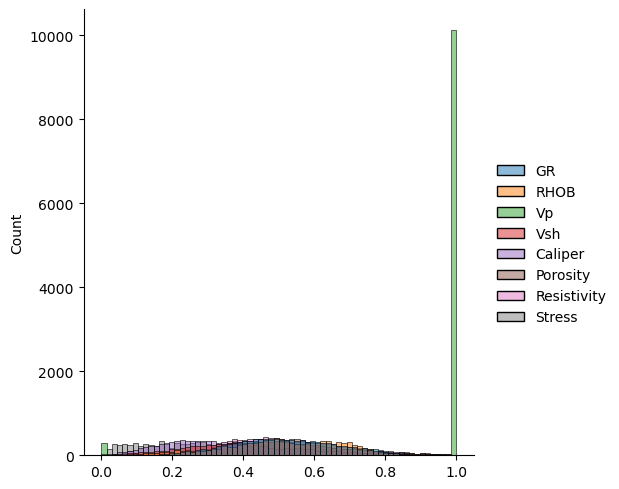

In [31]:
sns.displot(df_scaled[['GR','RHOB','Vp','Vsh','Caliper','Porosity',
                      'Resistivity','Stress']])

# Our Data is perfect and ready for model development

<Figure size 640x480 with 0 Axes>

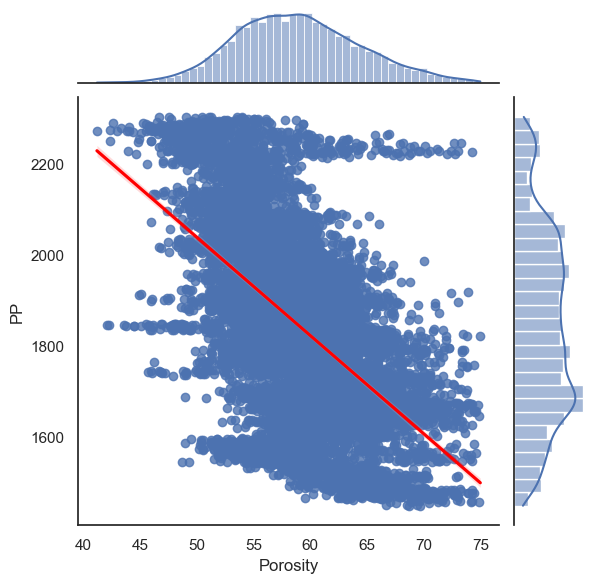

In [32]:
sns.set_theme(style='white')
plt.figure(dpi = (100))
sns.jointplot(x = df['Porosity'], y=df['PP'], kind='reg', line_kws={"color":"red"})

<Figure size 640x480 with 0 Axes>

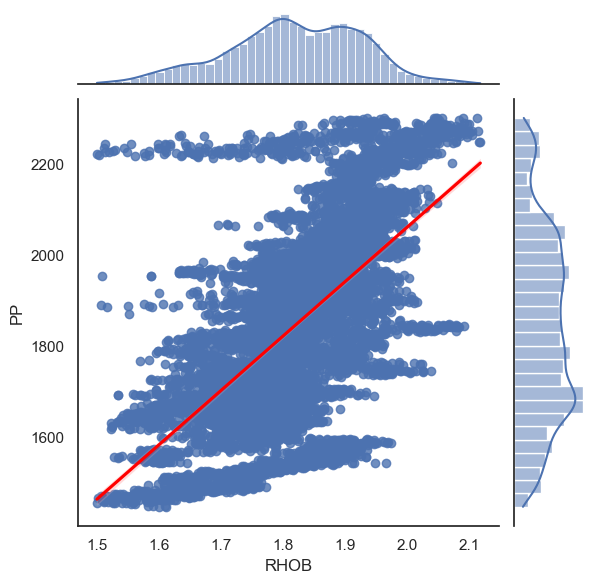

In [33]:
sns.set_theme(style='white')
plt.figure(dpi = 100)
sns.jointplot(x = df['RHOB'], y=df['PP'], kind='reg', line_kws={"color":"red"})

In [34]:
df= df_scaled.drop(['Vp'],axis=1)
df

,DEPTH,PP,GR,RHOB,Vsh,Caliper,Porosity,Resistivity,Stress
0,33.2800,1617.0,0.095351,0.087316,0.002970,0.937192,0.726727,0.314069,0.017649
1,33.4324,1620.0,0.277994,0.098007,0.187648,0.930059,0.804398,0.334395,0.018335
2,35.1088,1621.0,0.146424,0.144986,0.230534,0.858793,0.764288,0.363338,0.023780
3,35.2612,1620.0,0.047101,0.162644,0.173578,0.860497,0.803269,0.391064,0.024718
4,36.0232,1622.0,0.152046,0.136724,0.194618,0.917498,0.804055,0.391907,0.025682
...,...,...,...,...,...,...,...,...,...
10403,181.3026,1805.0,0.785251,0.543010,0.792334,0.335059,0.307047,0.641158,0.438688
10404,181.4550,1805.0,0.752223,0.525514,0.760394,0.313344,0.405877,0.649401,0.436171
10405,181.6074,1803.0,0.738662,0.506561,0.747281,0.258553,0.327461,0.659329,0.433404
10406,181.7598,1808.0,0.732966,0.477726,0.741773,0.277238,0.356041,0.671132,0.428971


In [35]:
df.corr()

,DEPTH,PP,GR,RHOB,Vsh,Caliper,Porosity,Resistivity,Stress
DEPTH,1.000000,0.709591,0.228171,0.596943,0.183359,-0.470626,-0.529550,0.512857,0.995396
PP,0.709591,1.000000,0.297317,0.618000,0.327807,-0.467341,-0.562232,0.654209,0.725342
GR,0.228171,0.297317,1.000000,0.448181,0.928665,-0.216557,-0.427141,0.200921,0.249181
RHOB,0.596943,0.618000,0.448181,1.000000,0.447860,-0.482734,-0.870870,0.442243,0.653090
Vsh,0.183359,0.327807,0.928665,0.447860,1.000000,-0.237762,-0.435956,0.237863,0.206708
Caliper,-0.470626,-0.467341,-0.216557,-0.482734,-0.237762,1.000000,0.375908,-0.416026,-0.470615
Porosity,-0.529550,-0.562232,-0.427141,-0.870870,-0.435956,0.375908,1.000000,-0.407968,-0.578736
Resistivity,0.512857,0.654209,0.200921,0.442243,0.237863,-0.416026,-0.407968,1.000000,0.522337
Stress,0.995396,0.725342,0.249181,0.653090,0.206708,-0.470615,-0.578736,0.522337,1.000000


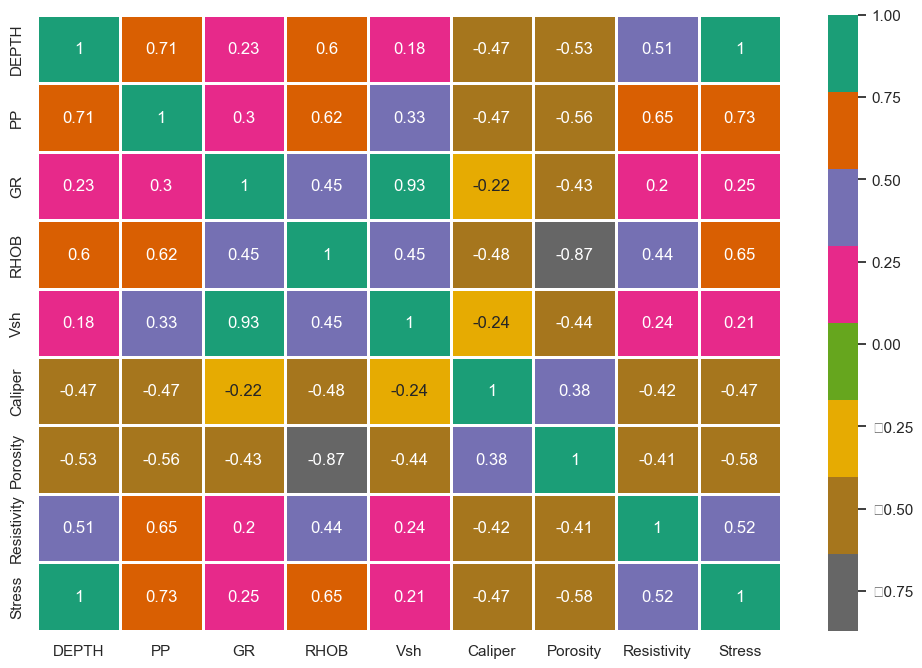

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

# Splitting the data

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x= df.drop(['PP','DEPTH'],axis=1) ##independent var
y= df['PP'] ## Dependet var

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [40]:
print("Training size:", x_train.shape)
print("Testing size:", x_test.shape)

Training size: (8326, 7)
Testing size: (2082, 7)


# We will be using the following models:
    
- Linear Regression(All kinds)
- Random Forest Regressor
- XGB Regressor
- SVM Regressor
- ANN

# 1) Regression Models

1.1) Multiple Linear Regression


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression(fit_intercept=True)
model.fit(x_train_scaled, y_train)
pred = model.predict(x_test_scaled)


In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True,)
model.fit(x_train, y_train)
pred = model.predict(x_test)

train_score = model.score(x_train, y_train)
print(f'Train score of trained model: {train_score*100}')
      
test_score = model.score(x_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 66.45814272114728
Test score of trained model: 66.76129338187422


In [43]:
print('Linear Model Coefficient (m):',model.coef_)
print('Linear Model Coefficient (b):', model.intercept_)

Linear Model Coefficient (m): [-297.43510232  123.38338375  332.52928266  -40.15254195  -46.89092057
  361.05216309  447.15782287]
Linear Model Coefficient (b): 1489.585559720977


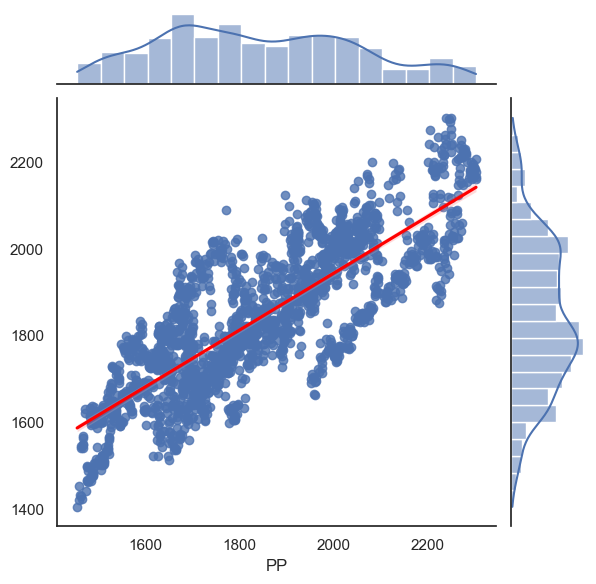

In [44]:
sns.set_theme(style="white")
sns.jointplot(x=y_test, y=pred, kind='reg', line_kws={"color": "red"})

## Plot for observing the predicted and actual values

# Evaluation for Simple Multiple Linear Regression model

In [45]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = x_test.shape[1]
n = len(x_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2_linreg = r2_score(y_test, pred)
adj_r2 = 1-(1-r2_linreg) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2_linreg, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,14416.857029
1,RMSE,120.070217
2,MAE,93.101311
3,MAPE,5.086101
4,r2,0.667613
5,adj_r2,0.666491


As we see the Simple Linear Regrsession model has not performed well.

Let us shift to Ridge regression

# 1.2) Ridge Regression

In [46]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.001,)
ridge.fit(x_train, y_train)

pred = ridge.predict(x_test)

train_score = ridge.score(x_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = ridge.score(x_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 66.4581427170586
Test score of trained model: 66.76127996840374


In [47]:
k = x_test.shape[1]
n = len(x_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2_ridge = r2_score(y_test, pred)
adj_r2 = 1-(1-r2_ridge) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2_ridge, adj_r2]
metrics = ['MSE', 'RMSE','MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'score': results})
table_results

,Metric,score
0,MSE,14416.862847
1,RMSE,120.070241
2,MAE,93.101138
3,r2,0.667613
4,adj_r2,0.666491


# Ridge Also did not perform well

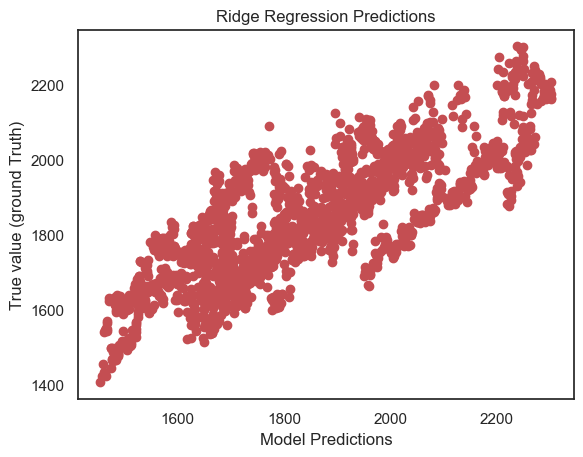

In [48]:
plt.plot(y_test, pred, "o", color= 'r')

plt.xlabel("Model Predictions")
plt.ylabel("True value (ground Truth)")
plt.title('Ridge Regression Predictions')
plt.show()

# 2) Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor()

reg.fit(x_train, y_train)

RandomForestRegressor()

In [50]:
pred=reg.predict(x_test)

In [51]:
rf_acc=r2_score(y_test, pred)
print("R^2",rf_acc)
print("Adusted R^2" , 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test,pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred)))

R^2 0.9504387140582105
Adusted R^2 0.9502714387440385
MAE 25.401482885686846
MSE 2149.6563684181897
RMSE 46.36438685476375


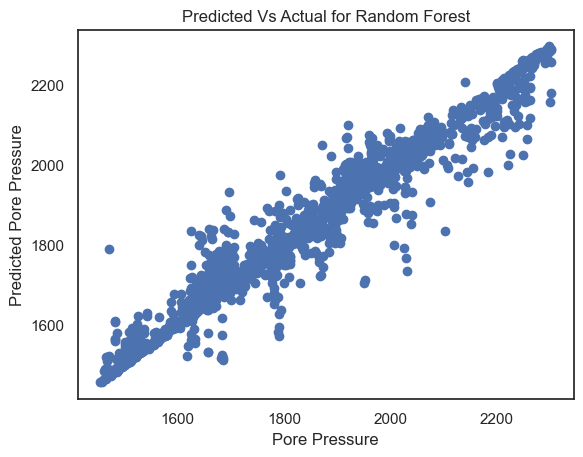

In [52]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for Random Forest")
plt.show()

# 3) XGB Regressor

In [53]:
from xgboost import XGBRegressor

xreg=XGBRegressor()

xreg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [54]:
pred=xreg.predict(x_test)

In [55]:
xgb_acc=r2_score(y_test, pred)
print("R^2",rf_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE" , mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, pred)))

R^2 0.9504387140582105
Adusted R^2 0.9328824068780123
MAE 36.76111446072362
MSE 2901.3459839497295
RMSE 53.86414376883503


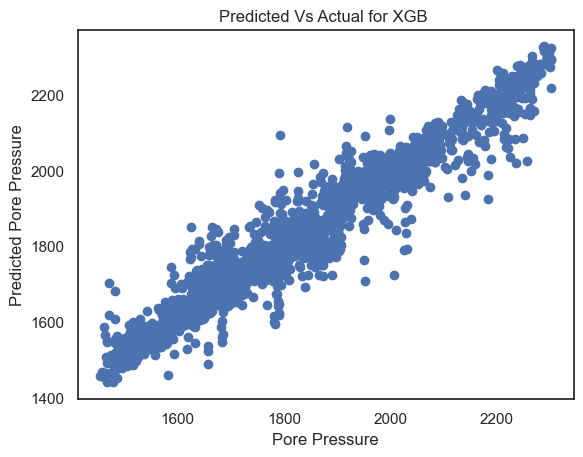

In [56]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for XGB ")
plt.show()

# 4) SVM Regressor

In [57]:
from sklearn import svm

regg=svm.SVR()

In [58]:
regg.fit(x_train, y_train)

SVR()

In [59]:
pred=regg.predict(x_test)

In [60]:
regg_acc=r2_score(y_test, pred)
print("R^2", regg_acc)
print("Adusted R^2" ,1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, pred)))

R^2 0.6612173963568495
Adusted R^2 0.6600739642326923
MAE 92.75511959855794
MSE 14694.255154843095
RMSE 121.21986287256348


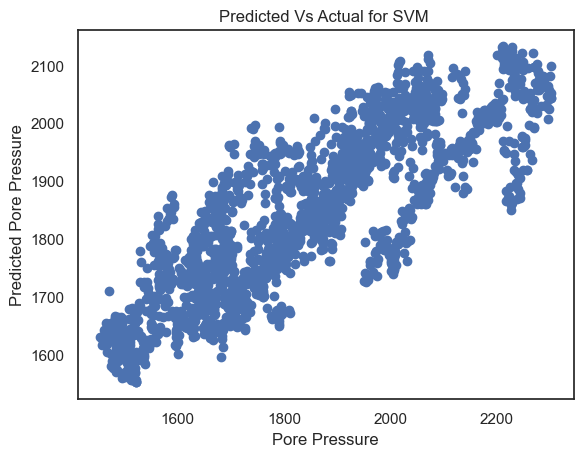

In [61]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for SVM ")
plt.show()

# 5) ANN

In [62]:
from tensorflow import keras

In [63]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=7, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error')

feature_cols = x_train
labels = y_train.values

model.fit(np.array(feature_cols), np.array(labels), epochs=100, batch_size=10)

Epoch 1/100
833/833 [==============================] - 2s 2ms/step - loss: 374298.1250
Epoch 2/100
833/833 [==============================] - 1s 2ms/step - loss: 19041.1113
Epoch 3/100
833/833 [==============================] - 1s 2ms/step - loss: 17951.5801
Epoch 4/100
833/833 [==============================] - 1s 2ms/step - loss: 17234.8945
Epoch 5/100
833/833 [==============================] - 1s 2ms/step - loss: 16622.0391
Epoch 6/100
833/833 [==============================] - 1s 2ms/step - loss: 16187.1113
Epoch 7/100
833/833 [==============================] - 1s 2ms/step - loss: 15703.9844
Epoch 8/100
833/833 [==============================] - 1s 2ms/step - loss: 15238.6533
Epoch 9/100
833/833 [==============================] - 1s 2ms/step - loss: 15049.5127
Epoch 10/100
833/833 [==============================] - 1s 2ms/step - loss: 14788.3281
Epoch 11/100
833/833 [==============================] - 1s 2ms/step - loss: 14588.0586
Epoch 12/100
833/833 [=============================

In [64]:
pred= model.predict(x_test)

66/66 [==============================] - 0s 1ms/step


In [65]:
ann_acc=r2_score(y_test, pred)
print("R^2",ann_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred)))

R^2 0.7680440352333431
Adusted R^2 0.7672611558922792
MAE 77.523288522248
MSE 10060.788524310532
RMSE 100.3034821145833


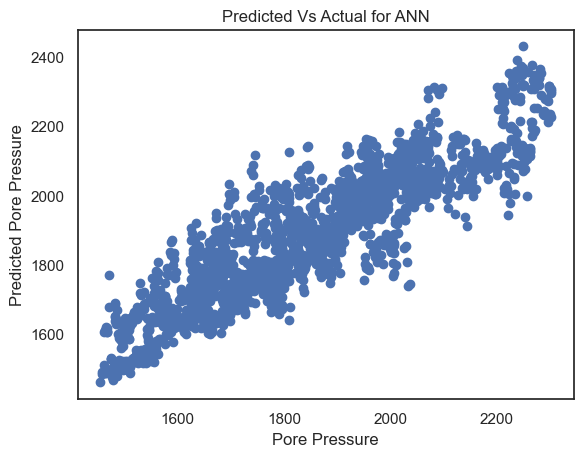

In [66]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for ANN")
plt.show()

In [67]:
models=pd.DataFrame({
    'model':['Linear Regression', 'Ridge Regression','Random Forest', 'XGBoost', 'Support Vector Machine', 'ANN'],
    'R_squared Score':[r2_linreg*100,r2_ridge*100, rf_acc*100, xgb_acc*100, regg_acc*100, ann_acc*100]
})
models.sort_values(by='R_squared Score', ascending=False)

,model,R_squared Score
2,Random Forest,95.043871
3,XGBoost,93.310817
5,ANN,76.804404
0,Linear Regression,66.761293
1,Ridge Regression,66.761280
4,Support Vector Machine,66.121740


# Hypertuning top 3 performing models

1) Random Forest Regressor

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
rf = RandomForestRegressor(random_state = 42)

In [70]:
from pprint import pprint
#Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# Defining the parameters

In [71]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [72]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(x_train,y_train)

In [73]:
#rf_random.best_params

In [74]:
rf_tuned= RandomForestRegressor(n_estimators= 800,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features='auto',
 max_depth=100,
 bootstrap= True)

In [75]:
y_train

2124    1897.000
394     1722.000
3101    1713.000
1737    1785.000
561     1770.000
          ...   
5734    1529.500
5191    1645.494
5390    1690.500
860     1854.000
7270    1999.000
Name: PP, Length: 8326, dtype: float64

In [76]:
rf_tuned.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, max_features='auto', n_estimators=800)

In [77]:
pred_tunedrf= rf_tuned.predict(x_test)

In [78]:
rftuned_acc=r2_score(y_test, pred_tunedrf)
print("R^2",rftuned_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred_tunedrf))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred_tunedrf))
print("MSE", mean_squared_error(y_test, pred_tunedrf))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred_tunedrf)))

R^2 0.9517254099666999
Adusted R^2 0.9515624774063175
MAE 25.258513078530406
MSE 2093.8476055634396
RMSE 45.75857958419863


In [79]:
rftuned_acc=r2_score(y_test, pred_tunedrf)
print("R^2",rftuned_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred_tunedrf))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred_tunedrf))
print("MSE", mean_squared_error(y_test, pred_tunedrf))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred_tunedrf)))

R^2 0.9517254099666999
Adusted R^2 0.9515624774063175
MAE 25.258513078530406
MSE 2093.8476055634396
RMSE 45.75857958419863


In [80]:
depth= np.linspace(30,300,len(x_test))

In [81]:
x_testplot= x_test.copy()

In [82]:
x_testplot['Depth']= depth

In [83]:
x_testplot['Acutal PP']= y_test

In [84]:
x_testplot['Predicted PP']= pred_tunedrf

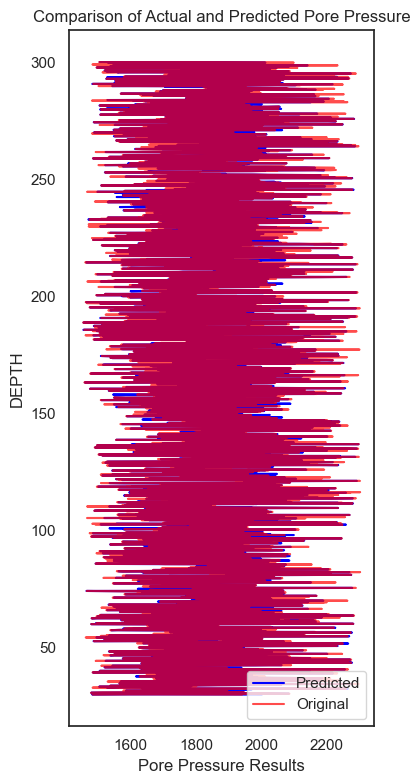

In [85]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)
plt.title('Comparison of Actual and Predicted Pore Pressure')
ax1.plot(x_testplot["Predicted PP"], x_testplot["Depth"],  color = 'blue', label='Predicted')
ax1.plot(x_testplot["Acutal PP"], x_testplot["Depth"],  color = 'red', alpha = 0.7, label='Original')
ax1.legend()
plt.xlabel('Pore Pressure Results')
plt.ylabel('DEPTH')
plt.tight_layout()
plt.show()

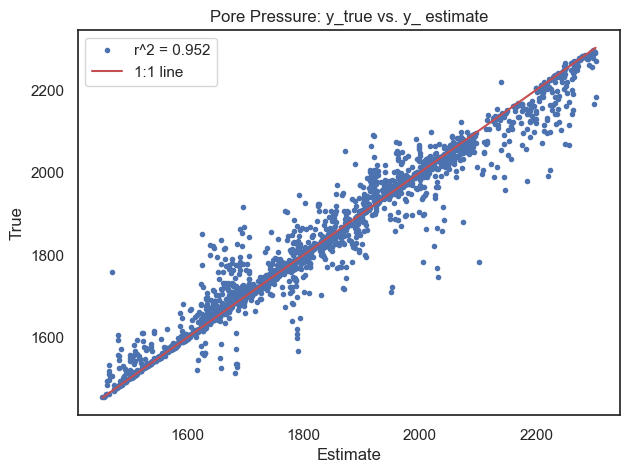

In [86]:
plt.figure(figsize=(7,5))
plt.plot(y_test, pred_tunedrf, '.', label = 'r^2 = %.3f' % (r2_score(y_test, pred_tunedrf)))
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r', label = '1:1 line')
plt.title('Pore Pressure: y_true vs. y_ estimate'); plt.xlabel('Estimate'); plt.ylabel('True')
plt.legend()

# 2) XG Boost Regressor

In [87]:
xgbr=XGBRegressor()

In [88]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

In [89]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(xgbr.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'reg:squarederror',
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}


In [90]:
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)

In [91]:
clf.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          predictor=None, random_state=None, ...),
                   n_iter=25,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='neg_mean_squared_error', verbose=1)

In [92]:
clf.best_params_

{'subsample': 0.7,
 'n_estimators': 100,
 'max_depth': 15,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.7999999999999999}

In [93]:
xgb_tuned= XGBRegressor(subsample= 0.7,
 n_estimators=500,
max_depth=15,
 learning_rate= 0.1,
 colsample_bytree= 0.7999999999999999,
 colsample_bylevel= 0.6)

In [94]:
xgb_tuned.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.6, colsample_bynode=None,
             colsample_bytree=0.7999999999999999, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [95]:
pred_tunedxgb= xgb_tuned.predict(x_test)

In [96]:
xgbtuned_acc=r2_score(y_test, pred_tunedxgb)
print("R^2",xgbtuned_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred_tunedxgb))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred_tunedxgb))
print("MSE", mean_squared_error(y_test, pred_tunedxgb))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred_tunedxgb)))

R^2 0.9424291991957439
Adusted R^2 0.942234890803444
MAE 33.55297159478942
MSE 2497.058666499478
RMSE 49.970578008458915


In [97]:
x_testplot['Predicted PP xgb']= pred_tunedxgb

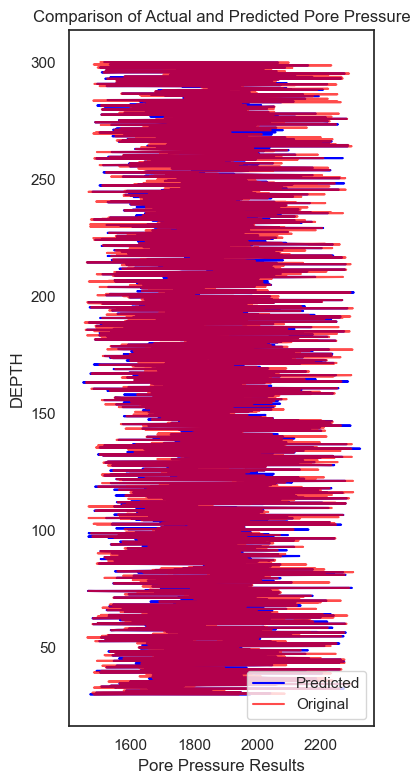

In [98]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)
plt.title('Comparison of Actual and Predicted Pore Pressure')
ax1.plot(x_testplot["Predicted PP xgb"], x_testplot["Depth"],  color = 'blue', label='Predicted')
ax1.plot(x_testplot["Acutal PP"], x_testplot["Depth"],  color = 'red', alpha = 0.7, label='Original')
ax1.legend()
plt.xlabel('Pore Pressure Results')
plt.ylabel('DEPTH')
plt.tight_layout()
plt.show()

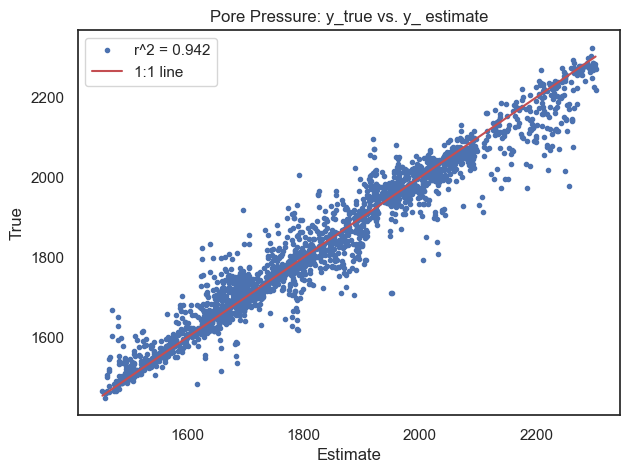

In [99]:
plt.figure(figsize=(7,5))
plt.plot(y_test, pred_tunedxgb, '.', label = 'r^2 = %.3f' % (r2_score(y_test, pred_tunedxgb)))
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r', label = '1:1 line')
plt.title('Pore Pressure: y_true vs. y_ estimate'); plt.xlabel('Estimate'); plt.ylabel('True')
plt.legend()

# Results
96 % accuracy was obtained by Random Forest Model in predicting Pore Pressure,
followed by 94% accuracy in XGB Regressor.

SVM did not perform well in this data as it
gave an accuracy of only around 60-70 %
Effective stress was also calculated from 
mathematical notions and predicted using ML 
algorithms with an accuracy of about 97 %
​